In [1]:
from platform import python_version
print('Version of the python language used in this project', python_version())

Version of the python language used in this project 3.10.19


In [2]:
# Manipulation and visualization of the data
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


# graph formatting

plt.style.use('fivethirtyeight')
plt.figure(1, figsize= (15,6))
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<Figure size 1500x600 with 0 Axes>

In [3]:
# Version packages used in this project

%reload_ext watermark
%watermark -a "Versions" --iversions

Author: Versions

seaborn   : 0.13.2
pandas    : 2.2.2
platform  : 1.0.8
sklearn   : 1.7.2
matplotlib: 3.8.4
numpy     : 1.26.4
datetime  : 5.5



### Loading e Understanding Data

In [4]:
df_food_delivery = pd.read_csv('dataset.csv', encoding='utf-8')

In [5]:
df_food_delivery.shape

(260645, 7)

In [6]:
df_food_delivery.head()

,id_transaction,order_time,location,item_name,item_quantity,latitude,longitude
0,0x7901ee,1/16/2019 18:33,7,drink,2,41.794132,-88.010140
1,0x7901ee,1/16/2019 18:33,7,pizza,2,41.794132,-88.010140
2,0x7901ee,1/16/2019 18:33,7,dessert,2,41.794132,-88.010140
3,0x12b47f,9/4/2019 12:36,3,salad,1,41.884490,-87.627059
4,0x12b47f,9/4/2019 12:36,3,dessert,1,41.884490,-87.627059


| Variable | Description |
|----------|------------|
| id_transaction | Transaction ID. The same ID may contain multiple items within a single order. |
| order_time | Exact time when the order was placed. |
| location | Location that processed the order (restaurant unit). |
| item_name | Item name (pizza, salad, beverage, and dessert). |
| item_quantity | Quantity of items in the order. |
| latitude | Latitude of the location where the order was generated. |
| longitude | Longitude of the location where the order was generated. |


| Variável | Descrição |
|----------|-----------|
| id_transacao | ID da transação. Um mesmo ID pode conter vários itens dentro de um único pedido. |
| horario_pedido | Horário exato em que o pedido foi realizado. |
| localidade | Localidade que processou o pedido (unidade do restaurante). |
| nome_item | Nome do item (pizza, salada, bebida e sobremesa). |
| quantidade_item | Quantidade de itens no pedido. |
| latitude | Latitude da localidade onde o pedido foi gerado. |
| longitude | Longitude da localidade onde o pedido foi gerado. |


### Exploratory Analysis

Let's explore the data from different perspectives and understand a tittle more about the relationship between the variables

In [7]:
# Check the total number of unique values per columns
df_food_delivery.nunique()

id_transaction    100000
order_time         76799
location               9
item_name              4
item_quantity          5
latitude               9
longitude              9
dtype: int64

In [8]:
# Data types
df_food_delivery.dtypes

id_transaction     object
order_time         object
location            int64
item_name          object
item_quantity       int64
latitude          float64
longitude         float64
dtype: object

In [9]:
# Summary of numeric columns
df_food_delivery.describe()

,location,item_quantity,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [10]:
# Summary of category columns
df_food_delivery.describe(include=['object', 'category'])

,id_transaction,order_time,item_name
count,260645,260645,260645
unique,100000,76799,4
top,0x1893a6,1/3/2019 17:53,dessert
freq,4,24,100000


We will start by creating a table that will provide us with  the number of times each item was requested in each order.


In [11]:
# create the pivot table totaling the items per transaction.
df_item_orders = df_food_delivery.pivot_table(index=['id_transaction', 'order_time', 'location'],
                                        columns = ['item_name'], 
                                        values = 'item_quantity',
                                        aggfunc = 'sum',
                                        fill_value=0
                                       ).rename_axis('index', axis = 1).reset_index()

In [12]:
# Shape
df_item_orders.shape

(100000, 7)

In [13]:
# Checks the total of unique values by columns
df_item_orders.nunique()

index
id_transaction    100000
order_time         76799
location               9
dessert                5
drink                  6
pizza                  6
salad                  6
dtype: int64

In [14]:
# View the orignal data
df_food_delivery.head()

,id_transaction,order_time,location,item_name,item_quantity,latitude,longitude
0,0x7901ee,1/16/2019 18:33,7,drink,2,41.794132,-88.010140
1,0x7901ee,1/16/2019 18:33,7,pizza,2,41.794132,-88.010140
2,0x7901ee,1/16/2019 18:33,7,dessert,2,41.794132,-88.010140
3,0x12b47f,9/4/2019 12:36,3,salad,1,41.884490,-87.627059
4,0x12b47f,9/4/2019 12:36,3,dessert,1,41.884490,-87.627059


In [15]:
# View the modified data
df_item_orders.head()

index,id_transaction,order_time,location,dessert,drink,pizza,salad
0,0x10000a,1/29/2019 0:48,9,1,0,1,0
1,0x100058,5/5/2019 0:08,6,2,0,2,0
2,0x1000c8,1/28/2019 19:24,9,5,4,4,1
3,0x10014c,2/23/2019 0:15,6,1,0,1,0
4,0x1001d8,6/30/2019 17:50,2,3,3,3,0


### Extracting time granularity

The order time column contains details such as month, day, and year. At some point, it may be useful to segment by month, for example. So let's extract the month and put it in a separate column.

In [16]:
# We extract the month from the order_time column and save it in a new column
df_item_orders['month'] = df_item_orders['order_time']\
    .apply(lambda x: time.strftime('%m', time.strptime(x,'%m/%d/%Y %H:%M')))

In [17]:
# View the result
df_item_orders.head()

index,id_transaction,order_time,location,dessert,drink,pizza,salad,month
0,0x10000a,1/29/2019 0:48,9,1,0,1,0,01
1,0x100058,5/5/2019 0:08,6,2,0,2,0,05
2,0x1000c8,1/28/2019 19:24,9,5,4,4,1,01
3,0x10014c,2/23/2019 0:15,6,1,0,1,0,02
4,0x1001d8,6/30/2019 17:50,2,3,3,3,0,06


### Descriptive Analysis

Distplot of attributes used for segmentation

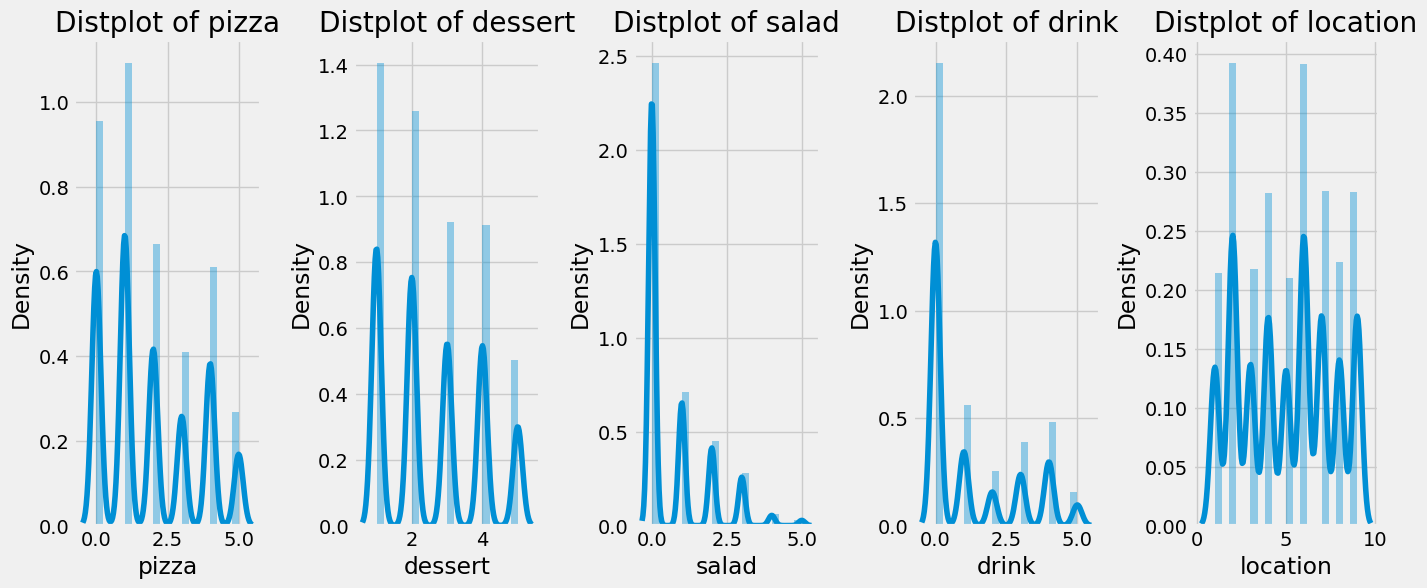

In [18]:
#Plot
# Figure size
plt.figure(1, figsize=(15,6))

#Initialize the counter
n = 0

# loop through columns
for x in ['pizza' , 'dessert' , 'salad', 'drink', 'location']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_item_orders[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

The distribution graphs show that most orders contain small quantities of items, with a strong concentration on low values (0, 1, or 2 units). Pizza and drinks are the most frequent items, showing greater variability, while desserts and salads appear in smaller proportions, characterizing niche items. The distributions are skewed to the right, indicating abnormal consumption behavior, which reinforces the need for normalization and appropriate treatment of variables for modeling and machine learning stages.

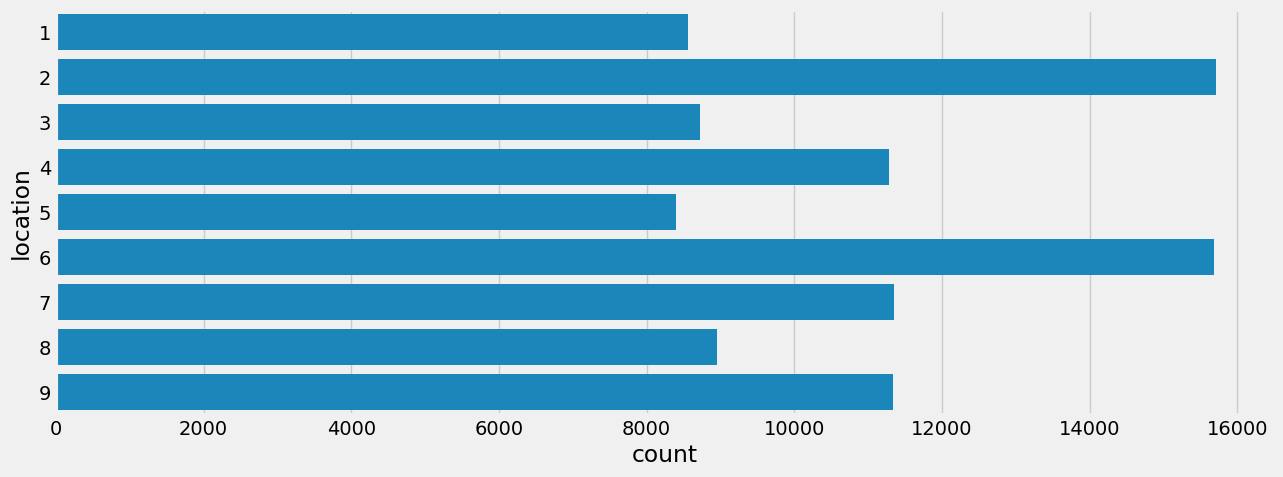

In [19]:
#plot
# Figure size
plt.figure(1, figsize = (14, 5))
# create plot
sns.countplot(y = 'location', data = df_item_orders)
plt.show()

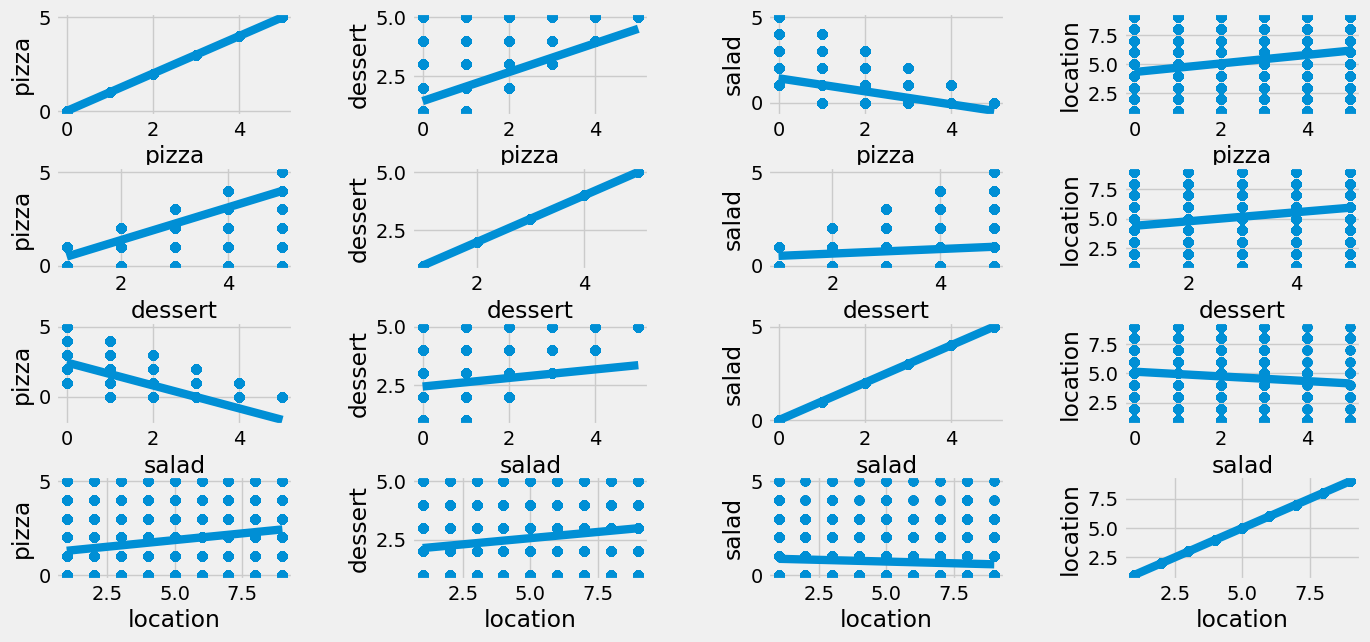

In [20]:
# Figure size
plt.figure(1, figsize=(15,7))

#Initialize the counter
n = 0

# looping through attributes
for x in ['pizza' , 'dessert' , 'salad', 'location']:
    for y in ['pizza' , 'dessert' , 'salad', 'location']:
        n += 1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x = x, y = y, data = df_item_orders)
        plt.ylabel(y)
plt.show()

### Defining variables for segmentations

We will remove transaction_id , order_time, location, and month for our initial clustering activities.

In [21]:
# Filtering th dataframe by columns
df = df_item_orders[['id_transaction','drink','pizza','dessert','salad']]

In [22]:
df.head()

index,id_transaction,drink,pizza,dessert,salad
0,0x10000a,0,1,1,0
1,0x100058,0,2,2,0
2,0x1000c8,4,4,5,1
3,0x10014c,0,1,1,0
4,0x1001d8,3,3,3,0


### Segmentation one

Using two variables (Pizza and Sobremesa)

In [23]:
# Selecting the variables
X1 = df[['pizza', 'dessert']].iloc[:,:].values

In [24]:
# List of WCSS ( Within Cluster Sum of Squares - WCSS)
wcss_X1 = []

### Segmentation on - Finding the ideal number of clusters
Let's test different K values (cluster values) between 2 and 10.
To initiate the clusters, we use the k-means++ algorithm, which offers faster convergence to the final result.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [25]:
# Loop to test the values of k
for n in range(2,11):
    model = (
            KMeans(
                    n_clusters = n,
                    init ='k-means++',
                    n_init = 10,
                    max_iter = 300,
                    tol = 0.0001,
                    random_state = 111,
                    algorithm = 'elkan')
    )
    model.fit(X1)
    wcss_X1.append(model.inertia_)

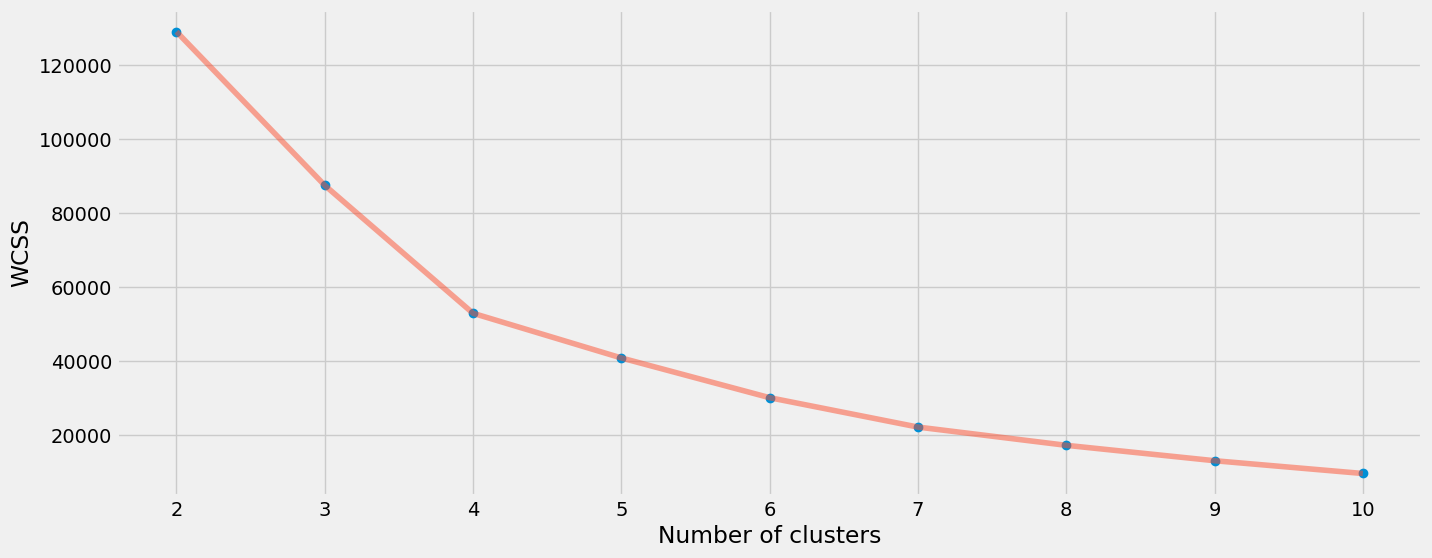

In [26]:
# Plot
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(2,11), wcss_X1, 'o')
plt.plot(np.arange(2,11), wcss_X1, '-', alpha= 0.5)
plt.xlabel('Number of clusters'),
plt.ylabel('WCSS')
plt.show()

The number of clusters was defined using the Elbow Curve. Although there were several possible options. the choice took into account simplicity and the objective of the project. At this initial stage, two clusters were used to facilitate the analysis and interpretation of the results.

### Segmentation one - Building and training the model

Let's perform our first segmentation using two variables
Using two variables (Pizza and Dessert)

In [27]:
# Create model

model_seg1 = KMeans(
                    n_clusters = 2,
                    init = 'k-means++',
                    n_init = 10,
                    max_iter= 300,
                    tol = 0.0001,
                    random_state= 111,
                    algorithm='elkan'
)

In [28]:
model_seg1.fit(X1)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,111
,copy_x,True
,algorithm,'elkan'


In [29]:
# Extraction of labels
labels1 = model_seg1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
# Extraction of centroids
centroids1 = model_seg1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

### Segmentation one - Visualization and interpretation of segments 

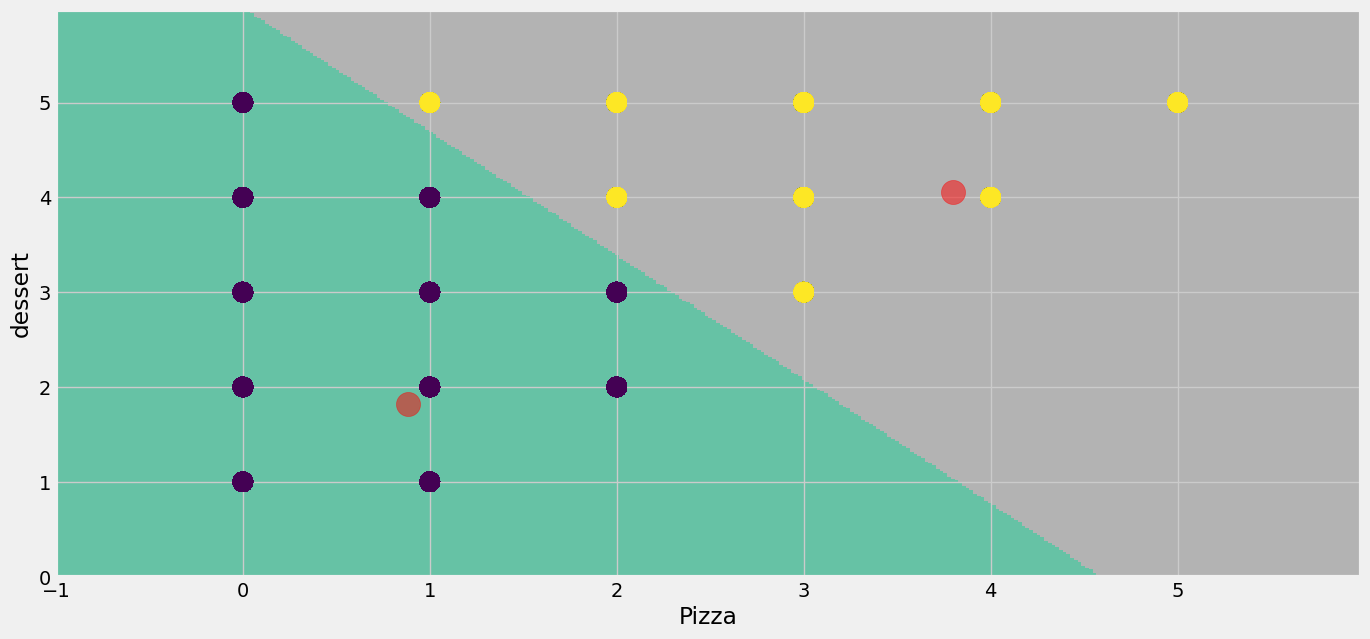

In [31]:
#Plot

# Meshgrid Parameters

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

#Plot of image

plt.imshow(
            Z,
            interpolation='nearest',
            extent = (xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Set2,
            aspect='auto',
            origin='lower'
)

#Plot the data points
plt.scatter(x = 'pizza', y = 'dessert', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:,0], y = centroids1[:,1], s = 300, c = 'red', alpha= 0.5)
plt.xlabel('Pizza')
plt.ylabel('dessert')
plt.show()


**Interpretation**:

The red dot is the centroid to each cluster (segment)
In cluster one (green area) we have customers who ordered 0, 1, or 2 pizzas. In all cases , dessert was ordered.
In cluster two ( gray area) are customers who ordered 2, 3, 4 or 5 pizzas. Note that as the number of pizzas ordered increases, so does the number of desserts.

**Analysis**:

Cluster One = Customers who ordered fewer pizzas. All ordered dessert.
Cluster Two = Custormers who orderd more pizzas. All ordered desserts in larger quantities

As a marketing  strategy, we could offers a free dessert if they purchase an additional, higher-price pizza. Based on segmentation, this strategy would likely be successful.

### Segmentation two

Segmentation two - variables (Pizza e Salada)

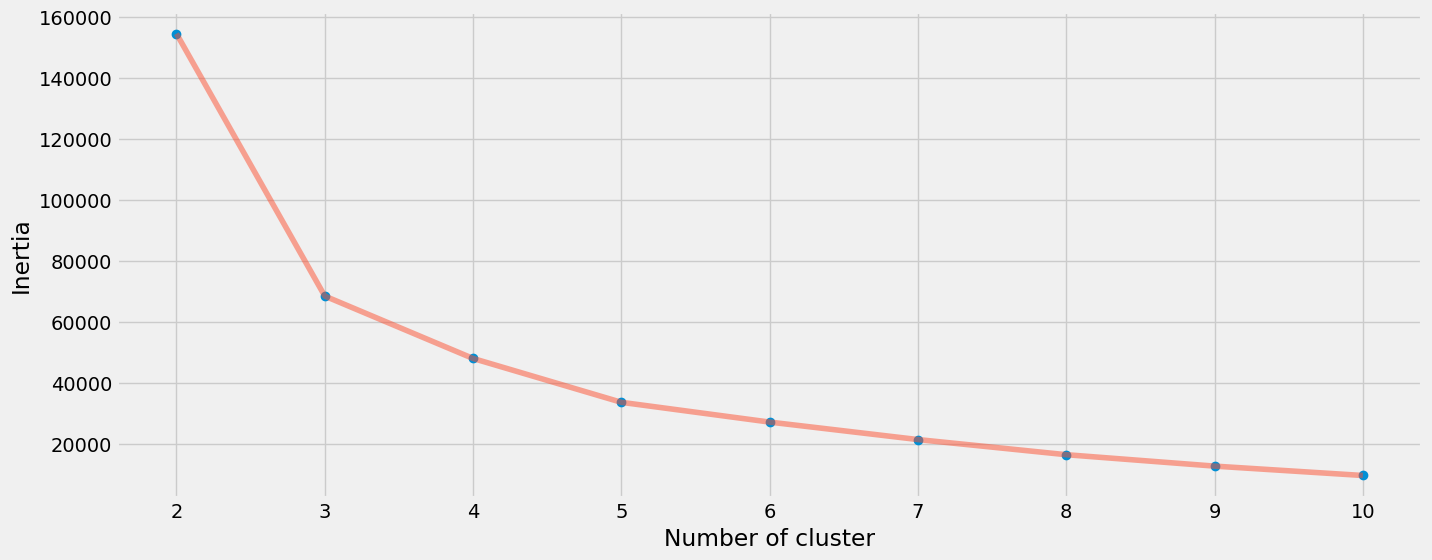

In [32]:
# We will use two variables
X1 = df[['pizza', 'salad']].iloc[:,:].values

# List of Inertia values (Inertia and WCSS are the same thing)
inertia = []

# Loop to test the values of k

for n in range(2, 11):
    model = KMeans(
                    n_clusters=n,
                    init= 'k-means++',
                    n_init=10,
                    max_iter= 300,
                    tol = 0.0001,
                    random_state= 111,
                    algorithm='elkan'
    )
    model.fit(X1)
    inertia.append(model.inertia_)

#Plot
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(2,11), inertia, 'o' )
plt.plot(np.arange(2,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

Let's create the models with 3 clusters

In [33]:
#Models 2
model_seg2 = (
                KMeans(
                        n_clusters=3,
                        init='k-means++',
                        n_init= 10,
                        max_iter= 300,
                        tol = 0.0001,
                        random_state=111,
                        algorithm='elkan'
                )
)
# Training model
model_seg2.fit(X1)

# Labels
labels2 = model_seg2.labels_

# Centroids
centroids2 = model_seg2.cluster_centers_

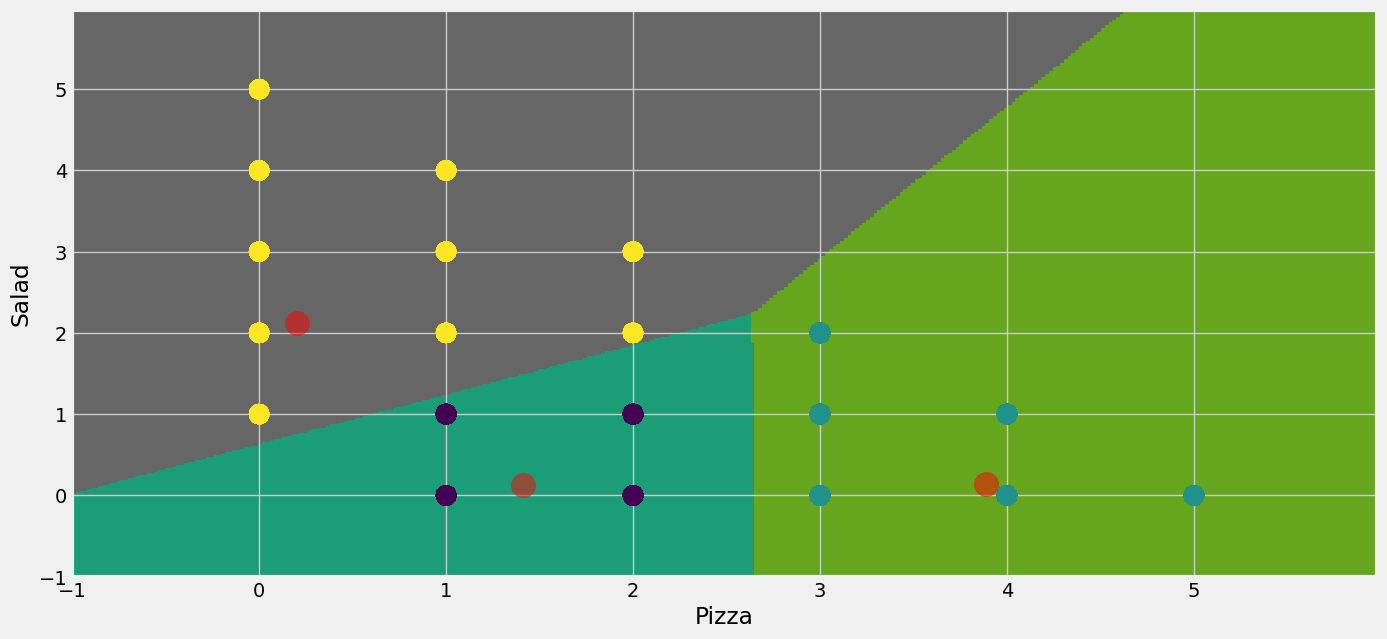

In [34]:
# Plot

# Meshgrid Parameters
h = 0.02
x_min, x_max = X1[:,0].min() -1 , X1[:,1].max() + 1
y_min, y_max = X1[:,1].min() -1 , X1[:,1].max() + 1
xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = model_seg2.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot of image
plt.figure(1, figsize=(15,7))
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(
            Z, 
            interpolation= 'nearest',
            extent= (xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Dark2,
            aspect= 'auto',
            origin= 'lower')

# Plot the data points
plt.scatter( x = 'pizza', y = 'salad', data = df, c = labels2, s = 200)
plt.scatter( x = centroids2[:, 0], y = centroids2[:,1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salad')
plt.show()

**Interpratation**:

The red dot is the centroids of each cluster (segment).
In cluster 1 (gray area) we have customers who ordered fewer pizzas and more salads.
In cluster 2 (dark green area) we have customers who ordered few pizzas and few salads.
In cluster 3 (light green area) we have customers who ordered more pizzas and fewer salads. 


**Analysis**

The clusters 1 and 3 are customers with apposite behaviors. The marketing team could focus its efforts on customers in cluster 2, as they are customers who buy pizzas and salads and therefore tend to consume a wider variety of items, avoiding keeping their pantries stocked with a single item.

Alternatively, they could focus their efforts on customers who consume products that generate more profit. We would have to check which item, pizza or salad, is more profitable.

### Segmentation 3

Segmentation three - variables (Pizza and Location)

In [35]:
# Filtering the dataframe by columns
df2 = df_item_orders[['id_transaction','drink', 'pizza', 'dessert', 'salad', 'location']]

In [36]:
# Dataset summary
df2.describe()

index,drink,pizza,dessert,salad,location
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,2.569210,0.711370,5.004700
std,1.627886,1.588589,1.332084,1.086524,2.544811
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,0.000000,3.000000
50%,0.000000,1.000000,2.000000,0.000000,5.000000
75%,3.000000,3.000000,4.000000,1.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,9.000000


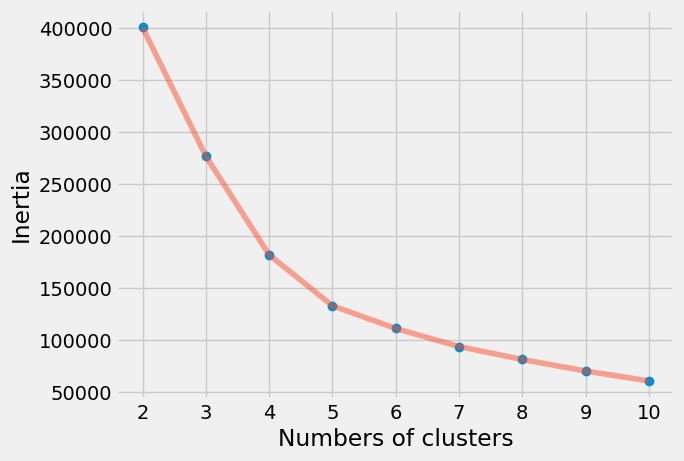

In [37]:
# We will use two variables
X1 = df2[['pizza', 'location']].iloc[:,:].values

# List of Inertia values (Inertia and WCSS are the same thing)
inertia = []

# Loop to test the values of k
for n in range(2,11):
    model = (
            KMeans(
                    n_clusters = n,
                    init= 'k-means++',
                    n_init= 10,
                    max_iter= 300,
                    tol = 0.0001,
                    random_state=111,
                    algorithm='elkan'
            )
    )
    model.fit(X1)
    inertia.append(model.inertia_)
    
#Plot
plt.figure(1, figure=(15,6))
plt.plot(np.arange(2,11), inertia, 'o')
plt.plot(np.arange(2,11), inertia, '-', alpha=0.5)
plt.xlabel('Numbers of clusters')
plt.ylabel('Inertia')
plt.show()


Let's create the models with 4 clusters

In [38]:
#Models 3

model_seg3 = (KMeans(n_clusters = 4,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )
# Training model
model_seg3.fit(X1)

# Labels
labels3 = model_seg3.labels_

# Centroids
centroids3 = model_seg3.cluster_centers_

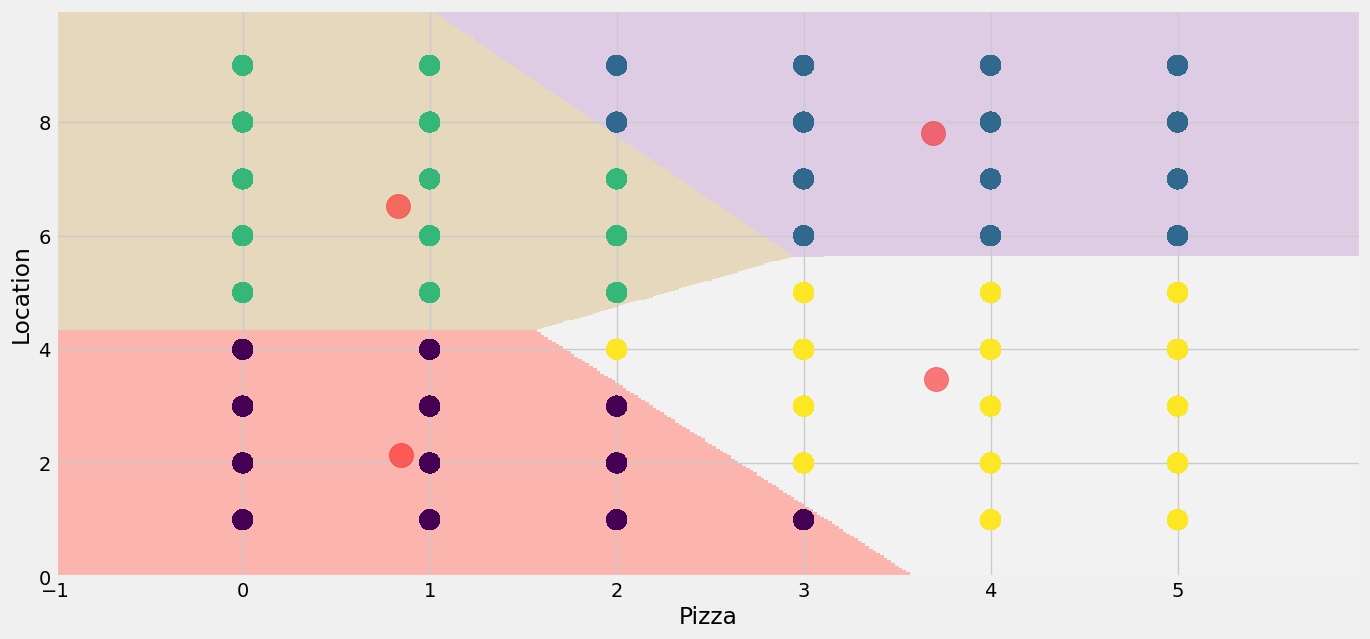

In [39]:
# Plot

# Meshgrid Parameters
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_seg3.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Plot of image
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, 
           aspect = 'auto', 
           origin = 'lower')

# Plot the data points
plt.scatter( x = 'pizza', y = 'location', data = df2, c = labels3, s = 200 )
plt.scatter(x = centroids3[: , 0], y =  centroids3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Location')
plt.show()

**Interpretatation**:

The dot red is the centroids to each cluster(segment)

Note that the clusters on the left side of the graph contain orders from all locations, but with fewer pizzas. The clusters on the right side of graph contain orders from all locations with a higher number of pizzas.

In [40]:
# Type
type(labels3)

numpy.ndarray

In [41]:
# Shape of labels
labels3.shape

(100000,)

In [42]:
#Converts the array to a dataframe
df_labels_pizza_salad = pd.DataFrame(labels2)
df_labels_pizza_location = pd.DataFrame(labels3)

In [43]:
# Visualize
print(df_labels_pizza_salad.head(3),"\n\n", df_labels_pizza_location.head(3))

   0
0  0
1  0
2  1 

    0
0  2
1  2
2  1


In [44]:
# Type
print(type(df_labels_pizza_salad),"\n\n",type(df_labels_pizza_location) )

<class 'pandas.core.frame.DataFrame'> 

 <class 'pandas.core.frame.DataFrame'>


In [45]:
# Let's merge df2 and the labels (clusters) found by the model
# Remenber that we only use two variables to create the segmentation
df_final = df2.merge(df_labels_pizza_salad, left_index=True, right_index= True)
df_final.rename(columns = {0:"cluster_pizza_salad"},inplace=True)

In [46]:
# Let's merge df_final labels 3 (clusters)
df_final = df_final.merge(df_labels_pizza_location, left_index=True, right_index= True)
df_final.rename(columns = {0:"cluster_pizza_location"},inplace=True)

In [47]:
# Visualize
df_final.head()

,id_transaction,drink,pizza,dessert,salad,location,cluster_pizza_salad,cluster_pizza_location
0,0x10000a,0,1,1,0,9,0,2
1,0x100058,0,2,2,0,6,0,2
2,0x1000c8,4,4,5,1,9,1,1
3,0x10014c,0,1,1,0,6,0,2
4,0x1001d8,3,3,3,0,2,1,3
